In [89]:
##read this in conjuction w/ the read_me_steps.txt file which outlines a few of the steps our group intends to take

import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)

In [90]:
##STEP 1 READ DATA IN & CHANGE COLUMN NAMES TO REAL NAMES
data_dict = {
    'P(IPO)':'offer_price',
    'P(H)': 'price_range_higher_bound',
    'P(L)': 'price_range_lower_bound',
    'P(1Day)':'first_day_trading_price',
    'C1':'days',
    'C2':'top_tier_dummy',
    'C3':'earnings_per_share',
    'C4':'prior_nasdaq_15day_returns',
    'C5':'outstanding_shares',
    'C6':'offering_shares',
    'C7':'sales',
    'T1':'number_of_sentences',
    'T2':'number_of_words',
    'T3':'number_of_real_words',
    'T4':'number_of_long_sentences',
    'T5':'number_of_long_words',
    'S1':'number_of_positive_words',
    'S2':'number_of_negative_words',
    'S3':'number_of_uncertain_words',
    'Y1':'pre_ipo_price_revision',
    'Y2':'post_ipo_initial_return',
    'C3':'positive_eps_dummy',
    'C5':'share_overhang',
    'C6':'up_revision',
    'I1':'ticker',
    'I2':'company_name',
    'I3':'industry_classifier'
    
}

df = pd.read_excel('Competition1_raw_data.xlsx')
df.rename(columns=data_dict,inplace=True)

#sketchy column values and not super valuable w/ 200+ categories anyway
df = df.drop('industry_classifier',1)
df.head()

,ticker,company_name,offer_price,price_range_higher_bound,price_range_lower_bound,first_day_trading_price,days,top_tier_dummy,positive_eps_dummy,prior_nasdaq_15day_returns,share_overhang,up_revision,sales,number_of_sentences,number_of_words,number_of_real_words,number_of_long_sentences,number_of_long_words,number_of_positive_words,number_of_negative_words,number_of_uncertain_words
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,10,9.5,8.5,11.87,122,1,3.43,0.0290743,40962052,10600000,51.345,470,12719,11560,301,690,62,117,139
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,8,10,8,7.25,259,0,-1.62,-0.0133516,28869196,2400000,25.936,791,21792,19585,510,1120,71,242,237
2,ACAD,ACADIA PHARMACEUTICALS INC,7,14,12,6.7,90,1,-1.24,0.020715,16845668,5000000,7.378,201,5262,4785,128,325,61,33,60
3,ACHN,ACHILLION PHARMACEUTICALS INC,11.5,16,14,12.39,209,1,-0.91,0.0200231,14848637,4500000,8.526,328,8259,7574,177,509,80,59,110
4,ACLI,AMERICAN COMMERCIAL LINES INC.,21,21,19,56.6,80,1,0.07,-0.0348947,30741716,8250000,632.298,572,14830,13176,336,720,67,149,167


In [91]:
#does price_range_higher_bound have to be higher than offer price and lower have to be lower than offer price? 
#if so this could filter out some bad records

mean[mean['price_range_lower_bound']>mean['offer_price']]
mean[mean['price_range_higher_bound']<mean['offer_price']]

#first day trading price of 0?
#number of words 0?
#number_of_real_words 0?
#number_of_long_sentences 0?
#number of long words -1?
#number of positive words -1?

#mean.sort_values('number_of_uncertain_words')

,ticker,company_name,offer_price,price_range_higher_bound,price_range_lower_bound,first_day_trading_price,days,top_tier_dummy,positive_eps_dummy,prior_nasdaq_15day_returns,share_overhang,up_revision,sales,number_of_sentences,number_of_words,number_of_real_words,number_of_long_sentences,number_of_long_words,number_of_positive_words,number_of_negative_words,number_of_uncertain_words,pre_IPO_price_revision,post_IPO_initial_return
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,10.0,9.5,8.5,11.870000,122.00,1.0,0.600000,0.029074,344.715307,3255.764119,3.716773,470.00,12719.00,11560.0,301.00,690.0,62.00,10.816654,139.0,0,1
13,AFFY,AFFYMAX INC,25.0,17.0,15.0,33.880001,140.00,1.0,-2.190000,-0.006316,242.781629,1923.538406,0.419834,416.00,10562.00,9835.0,231.00,726.0,81.00,10.862780,138.0,0,1
19,ALGT,Allegiant Travel CO,18.0,17.0,15.0,25.100000,207.00,1.0,0.630000,-0.012692,267.055023,2236.067977,5.098064,512.00,11684.00,10189.0,267.00,429.0,52.00,8.831761,91.0,0,1
33,AONE,"B456 SYSTEMS, INC.",13.5,9.5,8.0,20.290000,152.75,1.0,-0.750000,0.085097,366.878640,3476.666399,4.092132,536.00,13374.00,12334.0,304.00,748.0,66.00,12.206556,194.0,0,1
35,APEI,AMERICAN PUBLIC EDUCATION INC,20.0,19.0,18.0,35.919998,94.00,1.0,0.150000,-0.012383,257.373819,2165.063509,3.421234,400.00,10135.00,9114.0,233.00,545.0,47.00,8.306624,98.0,0,1
36,APKT,ACME PACKET INC,9.5,7.5,6.5,15.910000,133.00,1.0,0.000000,0.056475,384.190665,3387.407268,3.305592,547.00,14728.00,13418.0,345.00,841.0,60.00,12.206556,176.0,0,1
38,ARBX,ARBINET Corp,17.5,16.0,14.0,21.030001,160.00,1.0,1.400000,0.036867,289.173776,2556.443819,8.041276,322.00,7738.00,6866.0,186.00,342.0,35.00,7.745967,125.0,0,1
40,ARCO,Arcos Dorados Holdings Inc.,17.0,15.0,13.0,21.200000,20.00,1.0,0.510000,0.004670,366.878640,3476.666399,7.939438,572.00,17353.00,15234.0,430.00,917.0,84.00,12.000000,125.0,0,1
42,ARII,"American Railcar Industries, Inc.",21.0,18.0,16.0,22.955000,38.00,1.0,0.090000,0.029257,271.137283,2915.475947,8.472390,657.00,18736.00,17202.0,438.00,923.0,111.00,11.905881,262.0,0,1
46,ARUN,"ARUBA NETWORKS, INC.",11.0,10.0,8.0,14.150000,102.00,1.0,-0.160000,0.028310,421.980402,2828.427125,4.169833,407.00,12387.00,11330.0,280.00,613.0,50.00,9.110434,97.0,0,1


In [92]:
#JUST MAKING SURE THE FILTERING LOGIC TO DETERMINE NUMBER OF '-'s WORKS THE WAY I THINK IT WORKS
print(df.replace('-',np.nan).isna().sum().sales == len(df[df['sales']=='-']))
median = df.copy()
mean = df.copy()
#PRINT NUMBER OF MISSING VALUES IN EACH COLUMN
df.replace('-',np.nan).isna().sum()

True


ticker                         0
company_name                   0
offer_price                    5
price_range_higher_bound      10
price_range_lower_bound       10
first_day_trading_price       22
days                          22
top_tier_dummy                22
positive_eps_dummy            36
prior_nasdaq_15day_returns    22
share_overhang                 6
up_revision                    6
sales                         72
number_of_sentences            1
number_of_words                1
number_of_real_words           1
number_of_long_sentences       1
number_of_long_words           1
number_of_positive_words       1
number_of_negative_words       1
number_of_uncertain_words      1
dtype: int64

In [93]:
#STEP 2, IMPUTE MISSING DATA CREATE DATAFRAME W. MEAN REPLACEMENT
placeholder = df.replace('-',np.nan).isna().sum().reset_index().rename(columns={'index':'columns1',0:'nulls'})
needs_replacement = placeholder[placeholder['nulls']>0].columns1.unique()

mean_value_dict = {}

for i in needs_replacement:
    new_df = mean[mean['{}'.format(i)]!='-']
    med = new_df['{}'.format(i)].mean()
    mean_value_dict.update({i:med})

for i in needs_replacement:
    mean['{}'.format(i)] = mean['{}'.format(i)].replace('-',mean_value_dict['{}'.format(i)])

mean.replace('-',np.nan).isna().sum()
mean_value_dict

{'days': 149.72878787878787,
 'first_day_trading_price': 25.93476614935861,
 'number_of_long_sentences': 294.3538913362702,
 'number_of_long_words': 679.2202643171806,
 'number_of_negative_words': 120.1042584434655,
 'number_of_positive_words': 68.42143906020559,
 'number_of_real_words': 11395.844346549193,
 'number_of_sentences': 465.63436123348015,
 'number_of_uncertain_words': 144.75917767988253,
 'number_of_words': 12758.606461086638,
 'offer_price': 13.837666174298375,
 'positive_eps_dummy': 1.7889040247678045,
 'price_range_higher_bound': 15.481190476190477,
 'price_range_lower_bound': 13.515044642857143,
 'prior_nasdaq_15day_returns': 0.007282201411438542,
 'sales': 500.45996229508165,
 'share_overhang': 49357759.34467456,
 'top_tier_dummy': 0.8590909090909091,
 'up_revision': 12415194.229289941}

In [94]:
#STEP 2, IMPUTE MISSING DATA. CREATE DATAFRAME WITH MEDIAN REPLACEMENT
placeholder = df.replace('-',np.nan).isna().sum().reset_index().rename(columns={'index':'columns1',0:'nulls'})
needs_replacement = placeholder[placeholder['nulls']>0].columns1.unique()

median_value_dict = {}

for i in needs_replacement:
    new_df = median[median['{}'.format(i)]!='-']
    med = new_df['{}'.format(i)].median()
    median_value_dict.update({i:med})
    
median_value_dict

for i in needs_replacement:
    median['{}'.format(i)] = median['{}'.format(i)].replace('-',median_value_dict['{}'.format(i)])

median.replace('-',np.nan).isna().sum()
median_value_dict

{'days': 107.0,
 'first_day_trading_price': 14.8450002670288,
 'number_of_long_sentences': 279.0,
 'number_of_long_words': 624.0,
 'number_of_negative_words': 100.0,
 'number_of_positive_words': 60.0,
 'number_of_real_words': 10785.0,
 'number_of_sentences': 444.0,
 'number_of_uncertain_words': 134.0,
 'number_of_words': 12045.0,
 'offer_price': 13.5,
 'positive_eps_dummy': 0.01,
 'price_range_higher_bound': 15.0,
 'price_range_lower_bound': 13.0,
 'prior_nasdaq_15day_returns': 0.009124591224158932,
 'sales': 103.833,
 'share_overhang': 27400178.0,
 'top_tier_dummy': 1.0,
 'up_revision': 7398703.5}

In [95]:
##define and apply functions to calculate target variables

def calculate_Y1(mid,high,low):
    cut_off_point = (high + low) / 2
    if mid < cut_off_point:
        return 1
    else:
        return 0 
    
def calculate_Y2(offer_price, close_price):
    if offer_price < close_price:
        return 1
    else:
        return 0
    
mean['pre_IPO_price_revision'] = [calculate_Y1(mid,high,low) for mid,high,low in zip(mean['offer_price'],mean['price_range_higher_bound'],mean['price_range_lower_bound'])]    
median['pre_IPO_price_revision'] = [calculate_Y1(mid,high,low) for mid,high,low in zip(median['offer_price'],median['price_range_higher_bound'],median['price_range_lower_bound'])]

mean['post_IPO_initial_return'] = [calculate_Y2(offer_price,close_price) for offer_price, close_price in zip(mean['offer_price'],mean['first_day_trading_price'])]    
median['post_IPO_initial_return'] = [calculate_Y2(offer_price,close_price) for offer_price, close_price in zip(median['offer_price'],median['first_day_trading_price'])]


#median.to_csv('median_no_z_score.csv')
#mean.to_csv('mean_no_z_score.csv')

In [96]:
#define functions to calculate & replace outliers
def calculate_outliers(value,q1,q3,iqr):
    if value > q3 + 1.5*iqr:
        global upper_count
        upper_count = upper_count + 1
        return q3
    elif value < q1 - 1.5*iqr:
        global lower_count
        lower_count = lower_count + 1
        return q1
    else:
        return value
    

In [97]:
#GET THE COLUMNS THAT WE WANT TO NORMALIZE (ALL CONTINOUS COLUMNS EXCEPT FOR TICKER / COMPANY NAME)
z_score_columns = mean.drop(['ticker','company_name','top_tier_dummy','pre_IPO_price_revision','post_IPO_initial_return'],1).columns


In [98]:
#apply functions to calculate & replace errors, keeping track of the number of replacements in each column
#use list comprehensions for range of i's.
for col in z_score_columns:
    upper_count = 0
    lower_count = 0
    q1 = median[col].quantile(.25)
    q3 = median[col].quantile(.75)
    iqr = q3-q1
    median[col] = [calculate_outliers(value,q1,q3,iqr) for value, q1, q3, iqr in zip(median[col], [q1 for i in range(0,len(median))], [q3 for i in range(0,len(median))], [iqr for i in range(0,len(median))])]    
    print('median ' + col + ' ' + str(upper_count) + ' upper outliers replaced')
    print('median ' + col + ' ' + str(lower_count) + ' lower outliers replaced')
    print(' ')
    
for col in z_score_columns:
    upper_count = 0 
    lower_count = 0
    q1 = mean[col].quantile(.25)
    q3 = mean[col].quantile(.75)
    iqr = q3-q1
    mean[col] = [calculate_outliers(value,q1,q3,iqr) for value, q1, q3, iqr in zip(mean[col],[q1 for i in range(0,len(mean))],[q3 for i in range(0,len(mean))],[iqr for i in range(0,len(mean))])]
    print('mean ' + col + ' ' + str(upper_count) + ' upper outliers replaced')
    print('mean ' + col + ' ' + str(lower_count) + ' lower outliers replaced')
    print(' ')

median offer_price 14 upper outliers replaced
median offer_price 0 lower outliers replaced
 
median price_range_higher_bound 28 upper outliers replaced
median price_range_higher_bound 15 lower outliers replaced
 
median price_range_lower_bound 27 upper outliers replaced
median price_range_lower_bound 6 lower outliers replaced
 
median first_day_trading_price 59 upper outliers replaced
median first_day_trading_price 0 lower outliers replaced
 
median days 69 upper outliers replaced
median days 0 lower outliers replaced
 
median positive_eps_dummy 41 upper outliers replaced
median positive_eps_dummy 84 lower outliers replaced
 
median prior_nasdaq_15day_returns 0 upper outliers replaced
median prior_nasdaq_15day_returns 9 lower outliers replaced
 
median share_overhang 53 upper outliers replaced
median share_overhang 0 lower outliers replaced
 
median up_revision 72 upper outliers replaced
median up_revision 0 lower outliers replaced
 
median sales 89 upper outliers replaced
median sales

In [99]:
#WRITE OUT AND TEST 
#median.to_csv('median_no_outliers.csv')
#mean.to_csv('mean_no_outliers.csv')

In [100]:
from scipy.stats import skew

for col in z_score_columns:
    print(col + ' ' + str(skew(median[col])))
    
#skew(median.offer_price)
#median.hist()
#plt.show()

offer_price 0.06039858262790416
price_range_higher_bound -0.08925514480913105
price_range_lower_bound -0.07552738399604172
first_day_trading_price 0.19858482771795977
days 0.4836970895714529
positive_eps_dummy -0.2691040246777231
prior_nasdaq_15day_returns -0.13981468661917879
share_overhang 1.0008123629815167
up_revision 0.8162649558131012
sales 1.212434053221013
number_of_sentences 0.2952575883472776
number_of_words 0.3331722336388886
number_of_real_words 0.31508455331783725
number_of_long_sentences 0.3673822472122944
number_of_long_words 0.4203704208847791
number_of_positive_words 0.467278778122756
number_of_negative_words 0.5199203289945921
number_of_uncertain_words 0.35011147636825024


In [101]:
#OUTLIERS.
#use IQR to handle outliers if you haven't normalized
#1.5 * lower IQR or Higher IQR to get outliers

#then we need to skewness handling to get every column normalized.

#then impute the data. figure out which columns to use mean and median based on the histogram or the skewness function
#then scale the columns

#one hot encode any categorical variables
#also add the industry category and encode. or bin continous variables. do binning after feature_selection. only bin useful shit 
#not all missing data is nan, '-',


#OUTLIERS
#NORMALIZE FIRST
#CALCULATE Z-SCORE
#REPLACE OUTLIERS
#IMPUTE DATA figure out which columns to use mean and median based on the histogram. use skew function to detect skewness
#SCALE COLUMNS
#ONE HOT ENCODE

#use z-score if and only if you handled skewness (normalization)
#for categorical values impute w/ mode. for the rest impute w/ mean 


#undersampling / oversampling in  order to balance 0's and 1's. If it's not crazy unbalanced do undersampling (cut off extra data to even it out)
#1.5 as many 1's as 0's. If it's further unbalanced 3x 4x do over sampling. 

In [102]:
mean.head()

,ticker,company_name,offer_price,price_range_higher_bound,price_range_lower_bound,first_day_trading_price,days,top_tier_dummy,positive_eps_dummy,prior_nasdaq_15day_returns,share_overhang,up_revision,sales,number_of_sentences,number_of_words,number_of_real_words,number_of_long_sentences,number_of_long_words,number_of_positive_words,number_of_negative_words,number_of_uncertain_words,pre_IPO_price_revision,post_IPO_initial_return
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,10.0,9.5,8.5,11.870000,122.00,1.0,0.60,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,0,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,8.0,10.0,8.0,7.250000,152.75,0.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,1,0
2,ACAD,ACADIA PHARMACEUTICALS INC,7.0,14.0,12.0,6.700000,90.00,1.0,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,1,0
3,ACHN,ACHILLION PHARMACEUTICALS INC,11.5,16.0,14.0,12.390000,209.00,1.0,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,1,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,21.0,21.0,19.0,21.030001,80.00,1.0,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,0,1


In [103]:
#Check Skewness and normalize variables in Mean DataFrame
#functions used to normalize were a judgement call that was determined by inspection
import scipy.stats

for col in range(2,21):
    if abs(scipy.stats.skew(mean.iloc[:,col]))<=.5:
        #print(mean.columns[col],scipy.stats.skew(mean.iloc[:,col]),' - Symmetrical')
        pass
    elif scipy.stats.skew(mean.iloc[:,col])<(-.5) and scipy.stats.skew(mean.iloc[:,col]) >=(-1):
        print(mean.columns[col],scipy.stats.skew(mean.iloc[:,col]),' - Moderately Negatively Skewed')
    elif scipy.stats.skew(mean.iloc[:,col])>.5 and scipy.stats.skew(mean.iloc[:,col]) <1:
        print(mean.columns[col],scipy.stats.skew(mean.iloc[:,col]),' - Moderately Positively Skewed')
    elif scipy.stats.skew(mean.iloc[:,col])<-1:
        print(mean.columns[col],scipy.stats.skew(mean.iloc[:,col]),' - Highly Negatively Skewed')
    elif scipy.stats.skew(mean.iloc[:,col])>1:
        print(mean.columns[col],scipy.stats.skew(mean.iloc[:,col]),' - Highly Positively Skewed')

##No need to normalize dummy variable
print(' ')
#Apply cube root to share_overhang to normalize
print(scipy.stats.skew(np.cbrt(mean['share_overhang'])))
mean['share_overhang'] = np.cbrt(mean['share_overhang'])

#Apply Square root to up_revision to normalize
print(scipy.stats.skew(np.sqrt(mean['up_revision'])))
mean['up_revision'] = np.sqrt(mean['up_revision'])

#Apply cube root to sales to normalize
print(scipy.stats.skew(np.cbrt(mean['sales'])))
mean['sales'] = np.cbrt(mean['sales'])

#Apply Square root to number_of_negative_words to normalize
print(scipy.stats.skew(np.sqrt(mean['number_of_negative_words'])))
mean['number_of_negative_words'] = np.sqrt(mean['number_of_negative_words'])


top_tier_dummy -2.098290225275937  - Highly Negatively Skewed
share_overhang 0.9697129693431528  - Moderately Positively Skewed
up_revision 0.7971451051563555  - Moderately Positively Skewed
sales 1.0813539634476048  - Highly Positively Skewed
number_of_negative_words 0.5179597306591368  - Moderately Positively Skewed
 
0.18208840658889006
0.13389114380195302
-0.04286409180931812
0.029055337844225645


In [104]:
#Check Skewness and normalize variables in Median DataFrame
#functions used to normalize were a judgement call that was determined by inspection

import scipy.stats

for col in range(2,21):
    if abs(scipy.stats.skew(median.iloc[:,col]))<=.5:
        #print(mean.columns[col],scipy.stats.skew(median.iloc[:,col]),' - Symmetrical')
        pass
    elif scipy.stats.skew(median.iloc[:,col])<(-.5) and scipy.stats.skew(median.iloc[:,col]) >=(-1):
        print(median.columns[col],scipy.stats.skew(median.iloc[:,col]),' - Moderately Negatively Skewed')
    elif scipy.stats.skew(median.iloc[:,col])>.5 and scipy.stats.skew(median.iloc[:,col]) <1:
        print(median.columns[col],scipy.stats.skew(median.iloc[:,col]),' - Moderately Positively Skewed')
    elif scipy.stats.skew(median.iloc[:,col])<-1:
        print(median.columns[col],scipy.stats.skew(median.iloc[:,col]),' - Highly Negatively Skewed')
    elif scipy.stats.skew(median.iloc[:,col])>1:
        print(median.columns[col],scipy.stats.skew(median.iloc[:,col]),' - Highly Positively Skewed')

##No need to normalize dummy variable
print(' ')
#Apply cube root to share_overhang to normalize
print(scipy.stats.skew(np.cbrt(median['share_overhang'])))

#Apply cube root to up_revision to normalize
print(scipy.stats.skew(np.cbrt(median['up_revision'])))

#Apply cube root to sales to normalize
print(scipy.stats.skew(np.cbrt(median['sales'])))

#Apply Square root to number_of_negative_words to normalize
print(scipy.stats.skew(np.sqrt(median['number_of_negative_words'])))


mean.head()

top_tier_dummy -2.1192517713040706  - Highly Negatively Skewed
share_overhang 1.0008123629815167  - Highly Positively Skewed
up_revision 0.8162649558131012  - Moderately Positively Skewed
sales 1.212434053221013  - Highly Positively Skewed
number_of_negative_words 0.5199203289945921  - Moderately Positively Skewed
 
0.20518707217294313
-0.1311859863266954
-0.17131036229408955
0.03086460117977873


,ticker,company_name,offer_price,price_range_higher_bound,price_range_lower_bound,first_day_trading_price,days,top_tier_dummy,positive_eps_dummy,prior_nasdaq_15day_returns,share_overhang,up_revision,sales,number_of_sentences,number_of_words,number_of_real_words,number_of_long_sentences,number_of_long_words,number_of_positive_words,number_of_negative_words,number_of_uncertain_words,pre_IPO_price_revision,post_IPO_initial_return
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,10.0,9.5,8.5,11.870000,122.00,1.0,0.60,0.029074,344.715307,3255.764119,3.716773,470.0,12719.0,11560.0,301.0,690.0,62.0,10.816654,139.0,0,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,8.0,10.0,8.0,7.250000,152.75,0.0,-1.62,-0.013352,306.769065,1549.193338,2.960063,791.0,21792.0,19585.0,510.0,1120.0,71.0,15.556349,237.0,1,0
2,ACAD,ACADIA PHARMACEUTICALS INC,7.0,14.0,12.0,6.700000,90.00,1.0,-1.24,0.020715,256.347692,2236.067977,1.946762,201.0,5262.0,4785.0,128.0,325.0,61.0,5.744563,60.0,1,0
3,ACHN,ACHILLION PHARMACEUTICALS INC,11.5,16.0,14.0,12.390000,209.00,1.0,-0.91,0.020023,245.788861,2121.320344,2.042906,328.0,8259.0,7574.0,177.0,509.0,80.0,7.681146,110.0,1,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,21.0,21.0,19.0,21.030001,80.00,1.0,0.07,-0.034895,313.263192,2872.281323,8.583029,572.0,14830.0,13176.0,336.0,720.0,67.0,12.206556,167.0,0,1


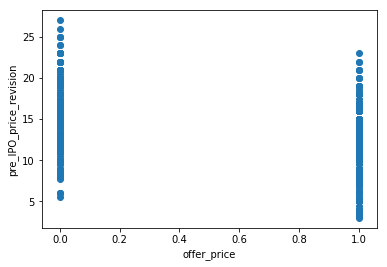

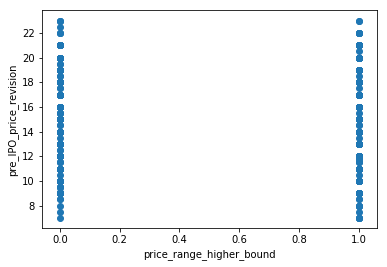

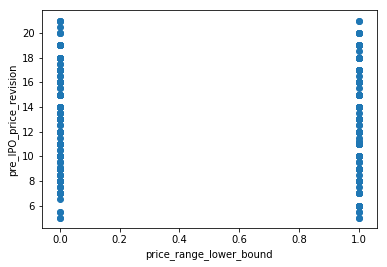

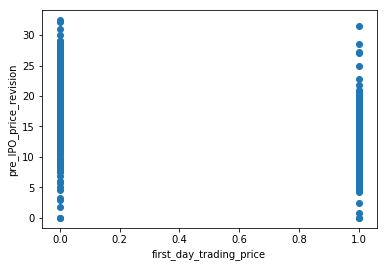

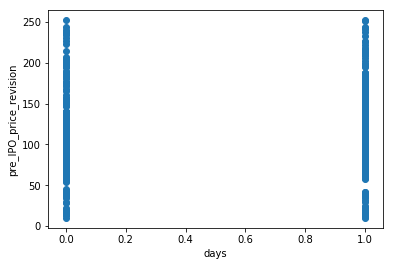

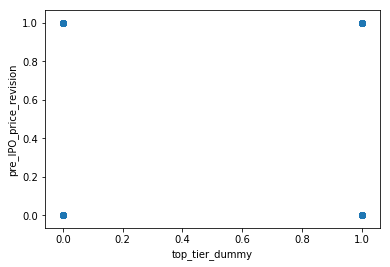

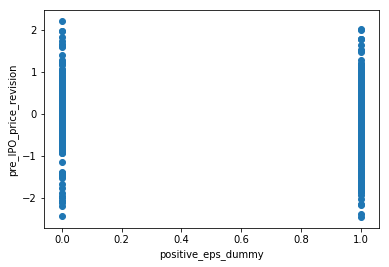

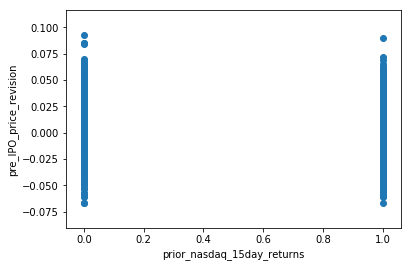

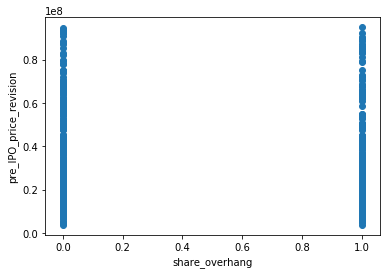

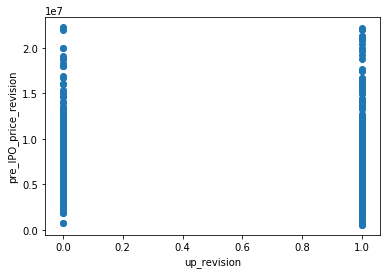

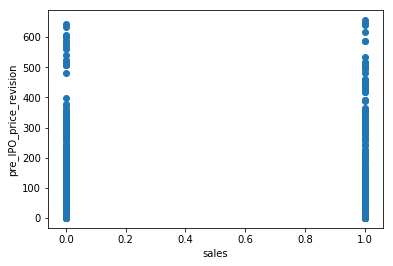

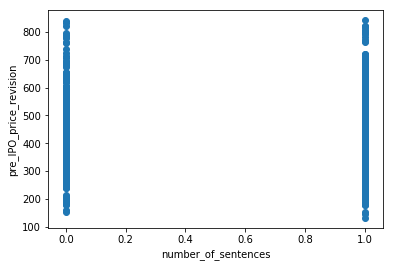

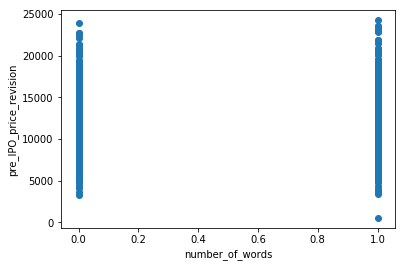

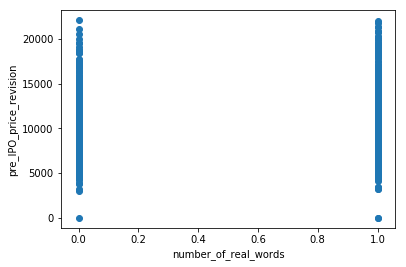

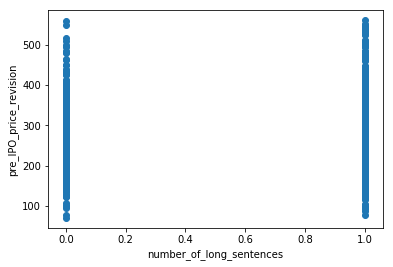

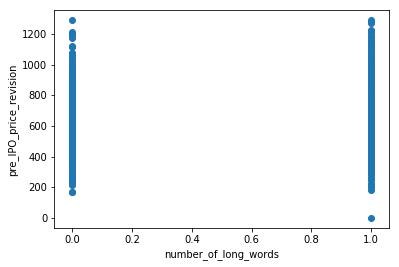

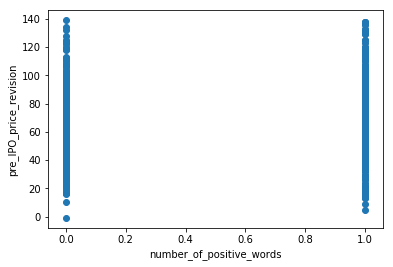

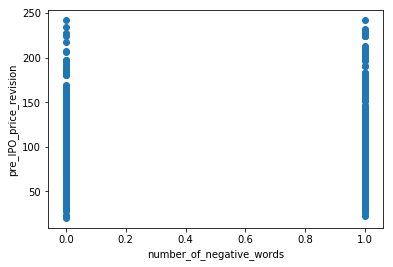

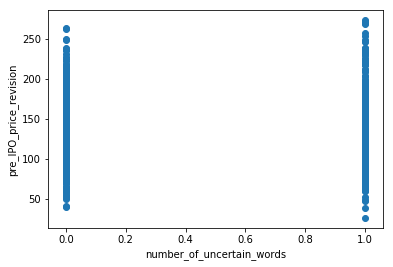

In [105]:
#STEP 3 EDA - CHECK OUT SCATTER PLOT RELATIONSHIP BETWEEN OFFER_PRICE AND 
import matplotlib.pyplot as plt

continous_columns = df.drop(['ticker','company_name'],1).columns

for i in continous_columns:
    plt.scatter(median['pre_IPO_price_revision'],median['{}'.format(i)])
    plt.xlabel('{}'.format(i))
    plt.ylabel('pre_IPO_price_revision')
    plt.show()
    

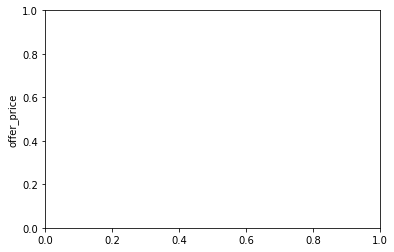

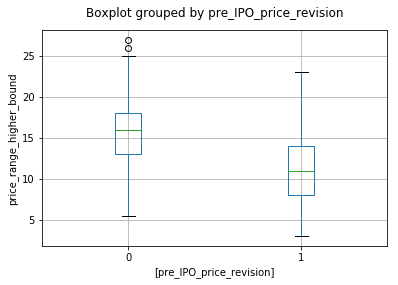

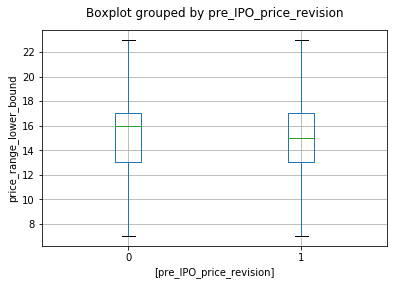

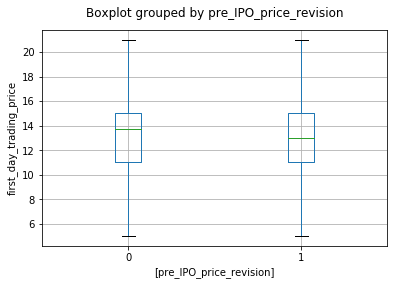

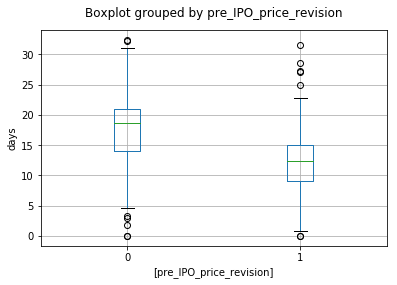

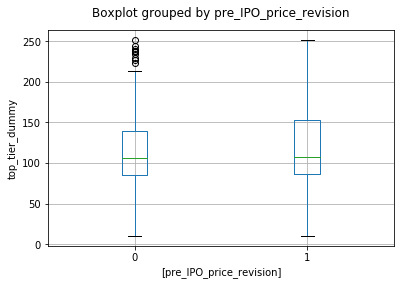

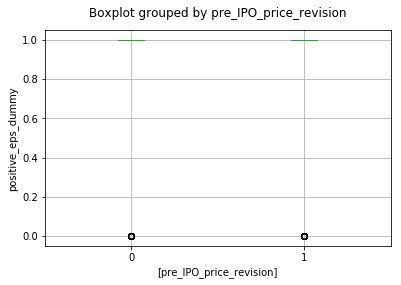

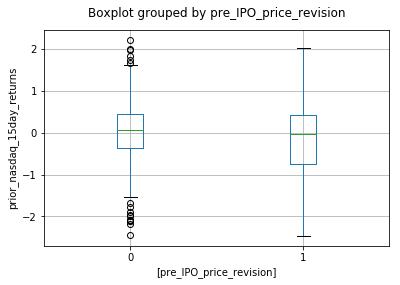

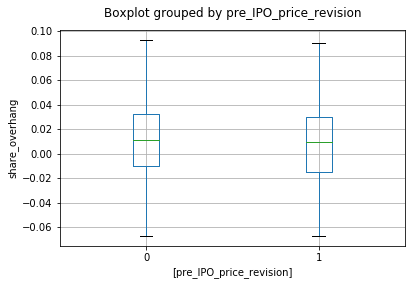

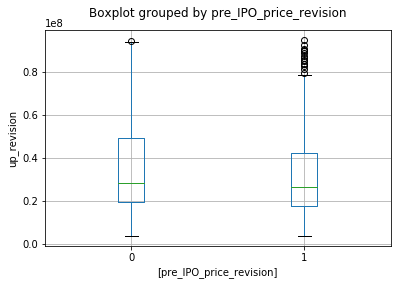

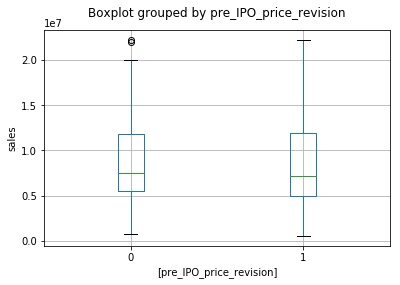

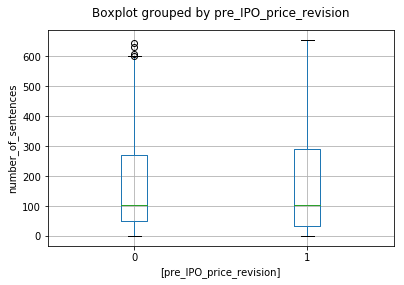

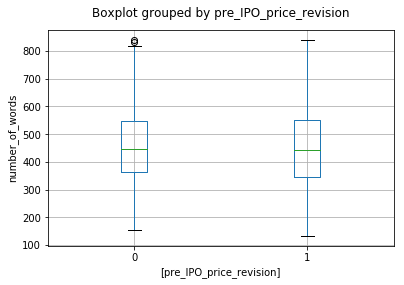

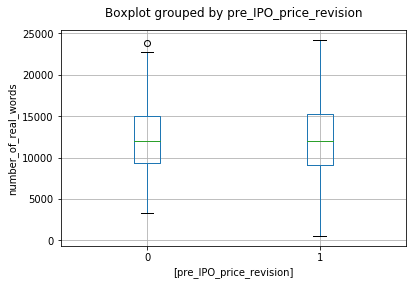

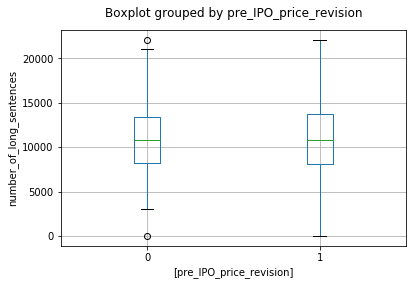

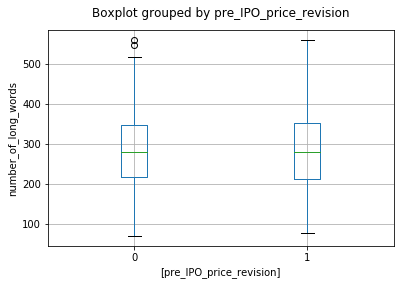

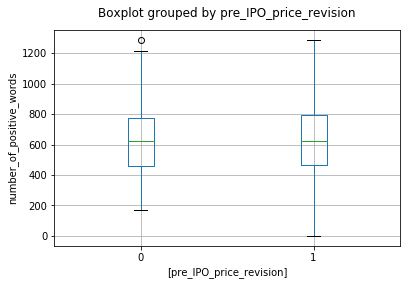

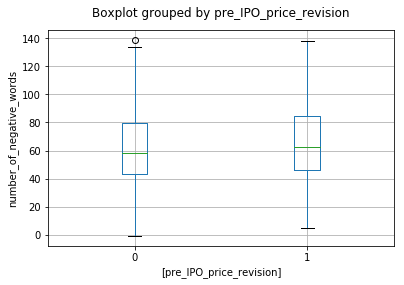

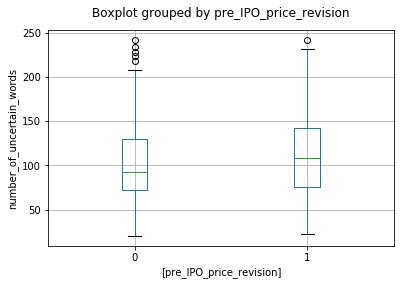

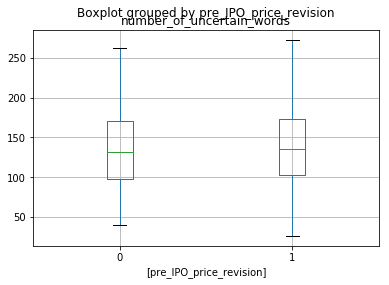

In [107]:
for i in continous_columns:
    plt.title('')
    plt.ylabel(i)
    median[['{}'.format(i),'pre_IPO_price_revision']].boxplot(by='pre_IPO_price_revision')

In [118]:
#GET THE COLUMNS THAT WE WANT TO NORMALIZE (ALL CONTINOUS COLUMNS EXCEPT FOR TICKER / COMPANY NAME)
z_score_columns = mean.drop(['ticker','company_name','top_tier_dummy','pre_IPO_price_revision','post_IPO_initial_return'],1).columns

#REPLACE EACH COLUMN IN THE MEAN PIPELINE W/ THE CORRESPONDING Z SCORE FOR THAT VALUE. hold off on this
for col in z_score_columns:
    mean[col] = (mean[col]-mean[col].mean())/mean[col].std(ddof=0)

#REPLACE EACH COLUMN IN THE MEDIAN PIPELINE W/ THE CORRESPONDING Z SCORE FOR THAT VALUE
for col in z_score_columns:
    median[col] = (median[col]-median[col].mean())/median[col].std(ddof=0)
    

In [119]:
median.to_csv('check_this_median_z.csv')
mean.to_csv('check_this_mean_z.csv')

In [121]:
#STEP 3 EDA - CORRELATIONS. WHICH OF THESE VARIABLES CAN WE REMOVE?
df.corr()

""


In [122]:
fake.first_day_trading_price

0      0.330457
1      0.201837
2      0.186526
3      0.344933
4      0.585468
5      0.395323
6      0.187082
7      0.126670
8      0.442650
9      0.000000
10     0.722015
11     0.167038
12     0.548441
13     0.943207
14     0.406459
15     0.377227
16     0.346604
17     0.397829
18     0.199610
19     0.698775
20     0.306236
21     0.480234
22     0.459354
23     0.167316
24     0.468263
25     0.585468
26     0.168708
27     0.559577
28     0.283129
29     0.141704
         ...   
652    0.239143
653    0.543708
654    0.416203
655    0.585468
656    0.336860
657    0.293987
658    0.203925
659    0.226476
660    0.444878
661    0.456570
662    0.517539
663    0.584633
664    0.251670
665    0.525056
666    0.515033
667    0.585468
668    0.208797
669    0.585468
670    0.585468
671    0.458797
672    0.235709
673    0.995824
674    0.807350
675    0.722015
676    0.517817
677    0.779510
678    0.431514
679    0.209354
680    0.346186
681    0.232186
Name: first_day_trading_

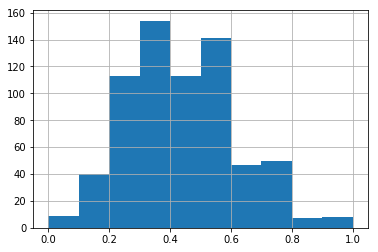

In [123]:
#STEP 4 STANDARDIZE/NORMALIZE
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

###STANDARDIZATION EXAMPLE 1. USE THIS FOR ALL THE COLUMNS DOWN THE ROAD
fake = mean
#fake.replace({'-',0 or median})
fake.first_day_trading_price.sort_values()

pd.Series(min_max_scaler.fit_transform(np.array(fake['first_day_trading_price']).reshape(-1,1)).reshape(1,682)[0]).hist()
import matplotlib.pyplot as plt 
plt.show()

In [ ]:
###HOW TO NORMALIZE DATAPOINTS W/O GENERATING RANDOM NEW DATA
###ALSO WHY WOULD WE EVEN WANT TO LOSE THE DISTRIBUTION OF THE DATAPOINTS...
###NOT CONVINCED NORMALIZING MAKES SENSE HERE...DISCUSS W/ JTAO

In [124]:
median

,ticker,company_name,offer_price,price_range_higher_bound,price_range_lower_bound,first_day_trading_price,days,top_tier_dummy,positive_eps_dummy,prior_nasdaq_15day_returns,share_overhang,up_revision,sales,number_of_sentences,number_of_words,number_of_real_words,number_of_long_sentences,number_of_long_words,number_of_positive_words,number_of_negative_words,number_of_uncertain_words,pre_IPO_price_revision,post_IPO_initial_return
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,-0.768182,-1.693082,-1.370457,-0.578273,0.144492,1.0,0.710850,0.675940,0.362220,0.536986,-0.717518,0.119742,0.093103,0.136162,0.147754,0.225837,-0.082536,0.220702,0.031577,0,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,-1.221265,-1.538521,-1.523786,-1.370225,0.813968,0.0,-2.013671,-0.710803,-0.237621,-1.422608,-0.893556,2.391968,2.229766,2.197048,2.259614,2.113295,0.245258,2.951544,2.106760,1,0
2,ACAD,ACADIA PHARMACEUTICALS INC,-1.447806,-0.302033,-0.297153,-1.464505,-0.552198,1.0,-1.511090,0.402707,-0.834023,-0.801274,-1.022129,-1.784398,-1.662997,-1.603714,-1.600341,-1.376307,-0.118958,-1.614424,-1.641275,1,0
3,ACHN,ACHILLION PHARMACEUTICALS INC,-0.428369,0.316211,0.316164,-0.489136,2.038619,1.0,-1.074637,0.380093,-0.933082,-0.920761,-1.014176,-0.885417,-0.957213,-0.887476,-1.105216,-0.568651,0.573052,-1.046409,-0.582508,1,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,1.723775,1.861821,1.849455,0.830355,-0.769914,1.0,0.221494,-1.414965,-0.144739,-0.024605,3.307430,0.841757,0.590237,0.551164,0.501415,0.357520,0.099572,0.919797,0.624486,0,1
5,ACOM,Ancestry.com Inc.,0.024714,-0.147472,-0.143824,-0.178869,-0.465112,1.0,0.208268,-2.155680,0.433691,-0.225964,0.295701,0.402885,1.336527,0.745825,0.420578,0.774517,-0.082536,-0.238080,0.920941,0,1
6,ACOR,ACORDA THERAPEUTICS INC,-1.674348,-0.611155,-0.603811,-1.461076,0.275121,1.0,-2.344317,-0.140194,-0.724830,-0.681786,-1.037593,0.296706,0.808778,0.750704,0.935912,0.260953,0.645895,-0.019612,-0.053125,1,1
7,ACRX,ACELRX PHARMACEUTICALS INC,-1.900889,-0.302033,-0.297153,-1.833054,-0.530427,0.0,-0.849798,1.053326,-0.708722,-0.084349,-0.353871,-0.842946,-0.258494,-0.250078,-0.104861,-2.807264,-0.337487,0.286242,-0.328404,1,0
8,ACTV,ACTIVE NETWORK INC,0.364526,0.934455,0.929480,0.112542,-0.334483,1.0,-0.545604,-1.232615,0.958469,0.632576,0.863874,1.181530,0.586234,0.624868,0.491310,1.222239,-0.228222,0.373629,2.043234,1,1
9,ACW,ACCURIDE CORP,-0.994723,1.243577,1.236138,-2.613006,-0.203853,1.0,2.099562,-1.089095,-0.001834,0.632576,2.349332,-0.481938,-0.751153,-0.750597,-0.893020,-0.788123,0.609474,-0.369160,0.200979,1,0


In [100]:
for col in z_score_columns:
    mean[col] = pd.Series(min_max_scaler.fit_transform(np.array(mean[col]).reshape(-1,1)).reshape(1,len(mean[col]))[0])
    median[col] = pd.Series(min_max_scaler.fit_transform(np.array(mean[col]).reshape(-1,1)).reshape(1,len(mean[col]))[0])

In [99]:
#STEP 4 STANDARDIZE/NORMALIZE
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

###STANDARDIZATION EXAMPLE 1. USE THIS FOR ALL THE COLUMNS DOWN THE ROAD
fake = mean
#fake.replace({'-',0 or median})
fake.first_day_trading_price.sort_values()

pd.Series(min_max_scaler.fit_transform(np.array(fake['first_day_trading_price']).reshape(-1,1)).reshape(1,682)[0])


len(np.array(fake['first_day_trading_price']).reshape(-1,1))
#import matplotlib.pyplot as plt 
#plt.show()

682